# Credit Card Fraud Detection
# Brian Mann

In [136]:
# imported libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [2]:
# dataset
df = pd.read_csv('/Users/alexmann/Documents/Datas/card_transdata.csv')

## Basic Stats

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [13]:
df.shape

(1000000, 8)

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# check for missing values
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [42]:
# create a copy of the dataframe that transforms 1s and 0s into yes and no
yn = df.copy()
for i in range(3, 8):
    col = yn.columns[i]
    yn[col] = yn[col].apply(lambda x: 'Yes' if x else 'No')
yn.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,Yes,Yes,No,No,No
1,10.829943,0.175592,1.294219,Yes,No,No,No,No
2,5.091079,0.805153,0.427715,Yes,No,No,Yes,No
3,2.247564,5.600044,0.362663,Yes,Yes,No,Yes,No
4,44.190936,0.566486,2.222767,Yes,Yes,No,Yes,No


## Boxplots

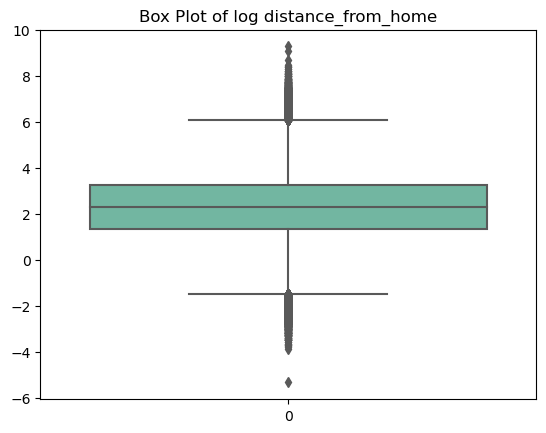

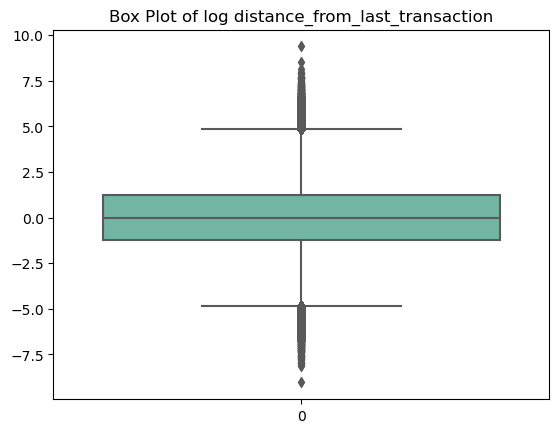

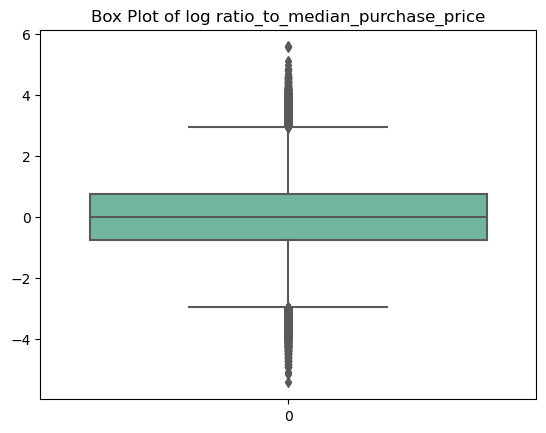

In [50]:
# create boxplots for each of the continuous variables with log transformations
for i in range(3):
    col = df.columns[i]
    sns.boxplot(np.log(df[col]), palette='Set2')
    plt.title(f'Box Plot of log {col}')
    plt.show()

## Histograms

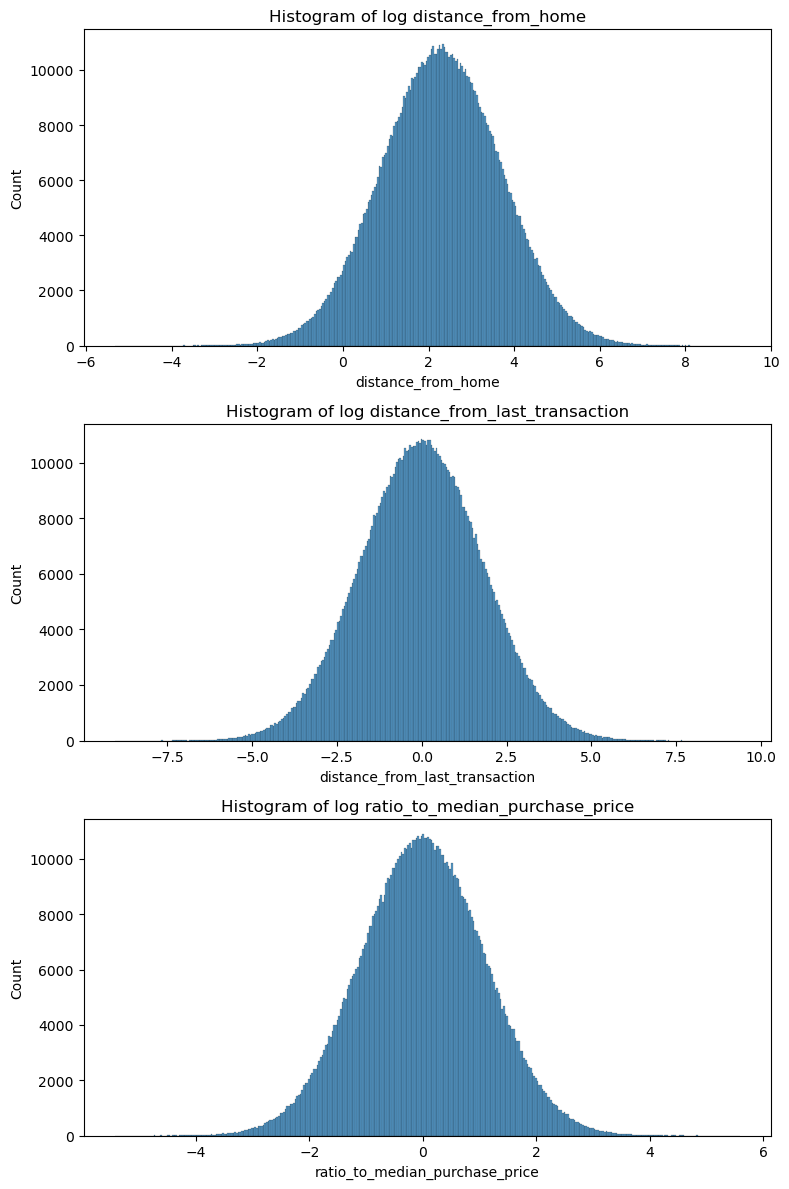

In [54]:
# plot the log-transformed histograms for each of the continous variables
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
for i in range(3):
    col = df.columns[i]
    ax[i].set_title(f'Histogram of log {col}')
    sns.histplot(np.log(df[col]), ax=ax[i])
plt.tight_layout()
plt.show()

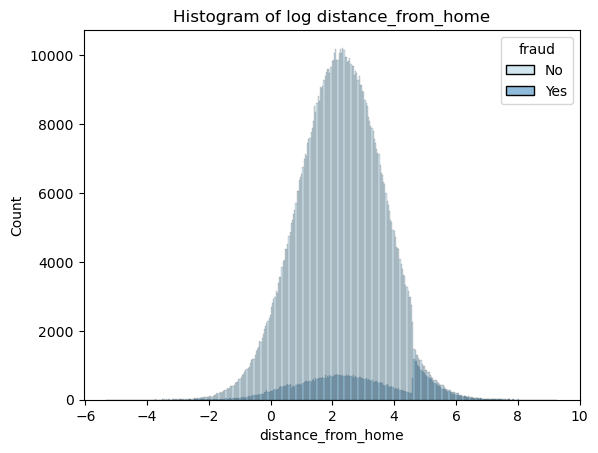

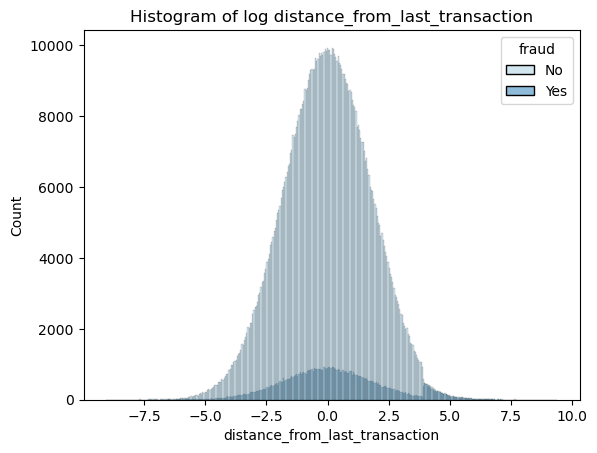

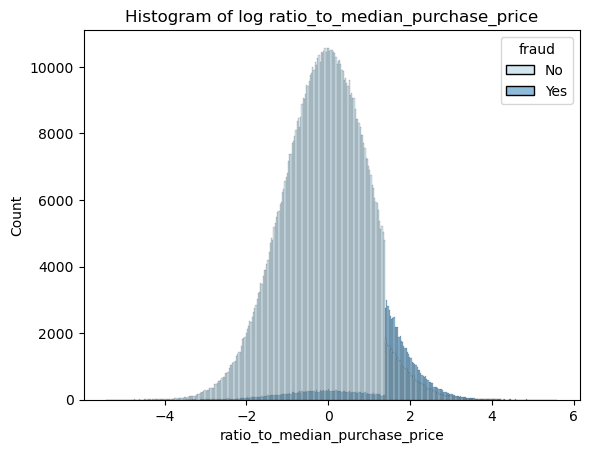

In [46]:
# plot the overlayed histograms for each of the continuous variables grouped by 
# fraud or non-fraud classification
for i in range(3):
    col = yn.columns[i]
    plt.title(f'Histogram of log {col}')
    sns.histplot(data=yn, x=np.log(yn[col]), hue=yn['fraud'], palette='Paired')
    plt.show()

## Bar Charts

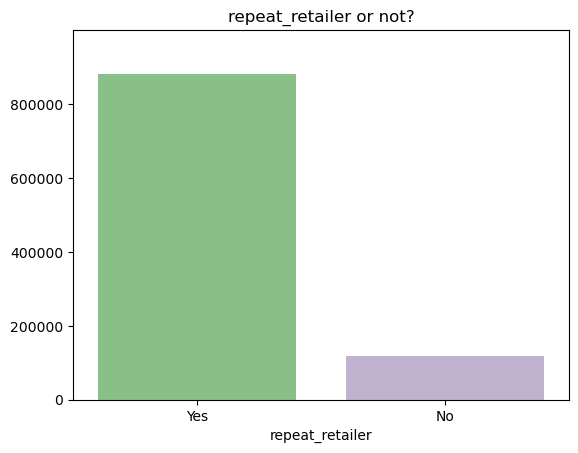

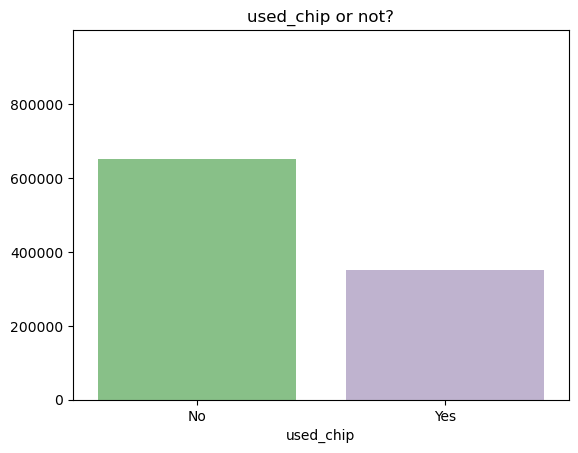

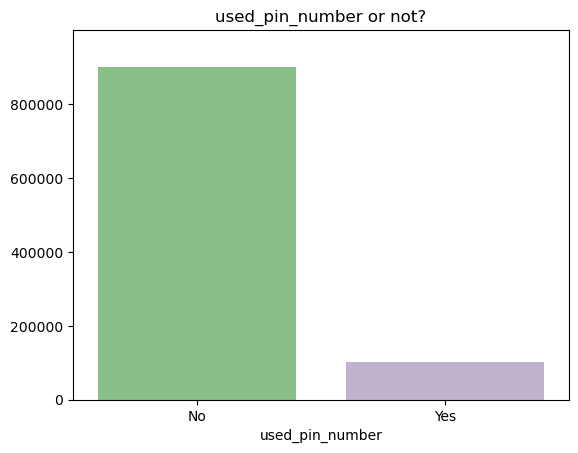

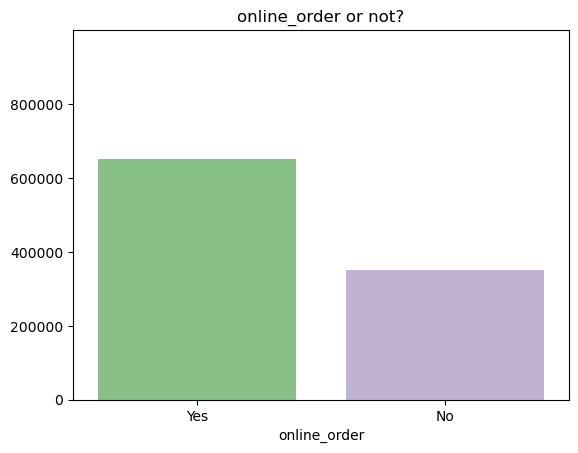

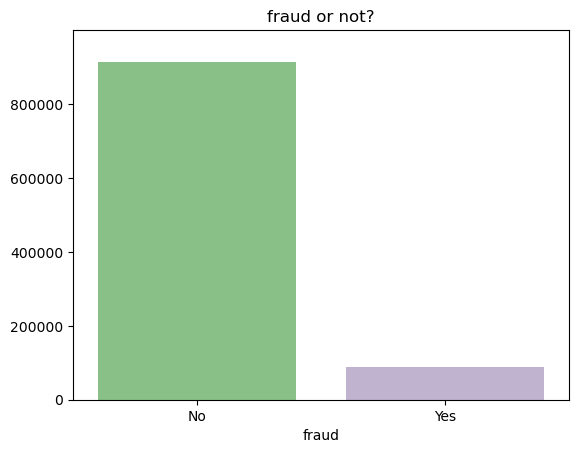

In [47]:
# plot the number of transactions that apply to each of the categorical variables
for i in range(3, 8):
    col = yn.columns[i]
    yesno = yn[col].value_counts()
    plt.title(f'{col} or not?')
    sns.barplot(x=yesno.index, y=yesno.values, palette='Accent')
    plt.ylim(0,999999)
    plt.show()

## Pie Charts

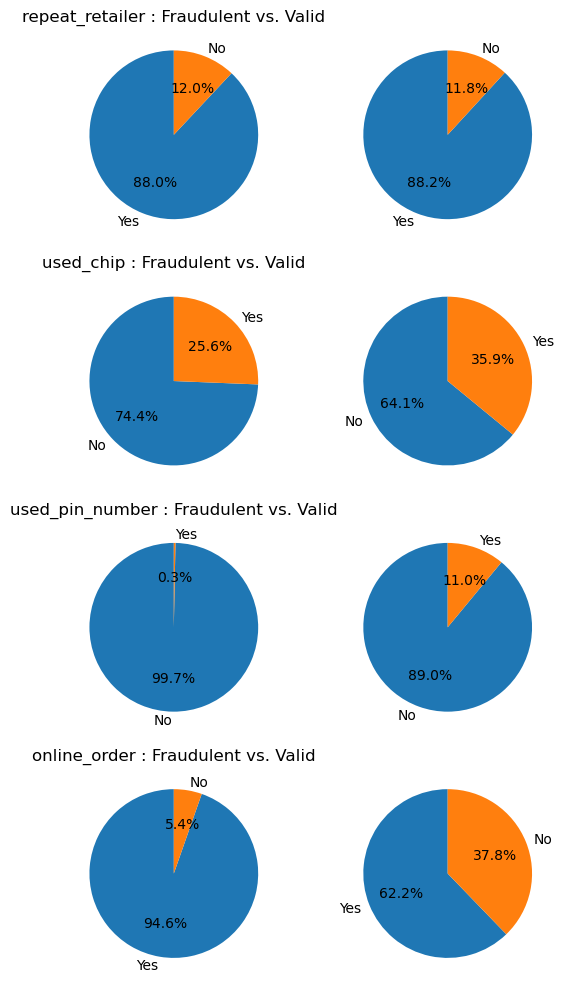

In [81]:
# group the transactions by fraud classification
fgroup = yn.groupby('fraud')
# create a pie chart for the percentage of transactions that apply to each category, with
# fraudulent transactions on the left and valid transactions on the right
fig, ax = plt.subplots(4, 2, figsize=(6, 10))
for i in range(4):
    col = yn.columns[i+3]
    counts = fgroup[col].value_counts()
    ax[i, 0].set_title(f'{col} : Fraudulent vs. Valid')
    ax[i, 0].pie(counts['Yes'], labels=counts['Yes'].index, autopct='%1.1f%%', startangle=90)
    ax[i, 1].pie(counts['No'], labels=counts['No'].index, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

## Comparisons with Fraud

In [37]:
# make a correlation plot for the dataset
corrplot = df.corr()

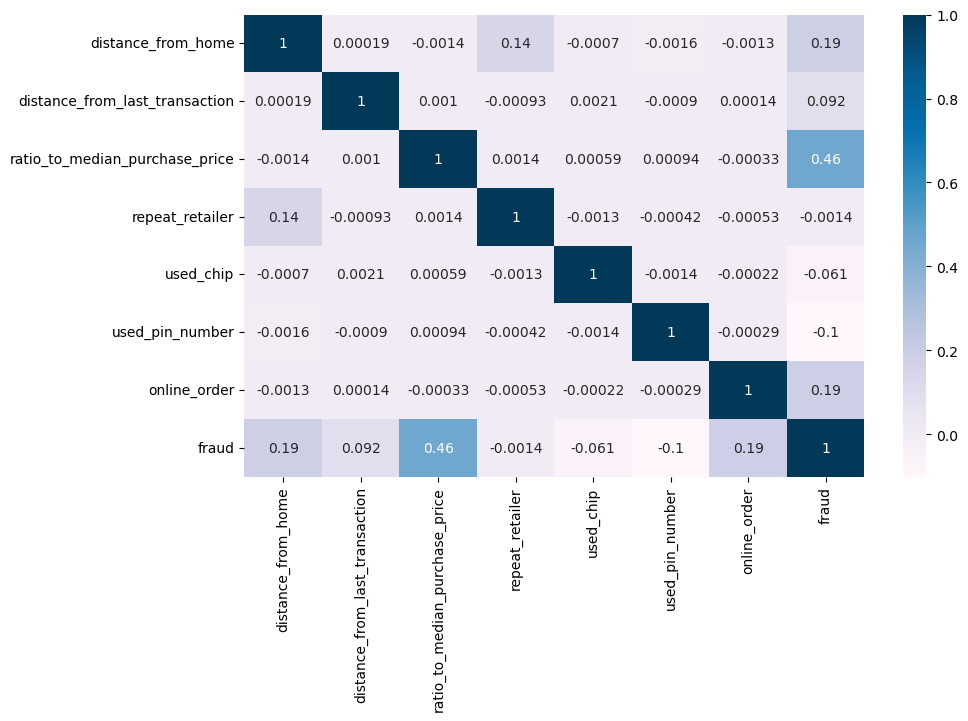

In [131]:
# plot the correlations in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corrplot, cmap='PuBu', annot=True)
plt.show()

## Decision Tree Modeling

In [112]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='fraud'), df['fraud'], test_size=0.2, random_state=1234)

In [113]:
# create a decision tree classifier with a limited max depth
dtc = DecisionTreeClassifier(max_depth=3, min_samples_split=100)
# fit the decision tree to the data and make a prediction on the test set
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

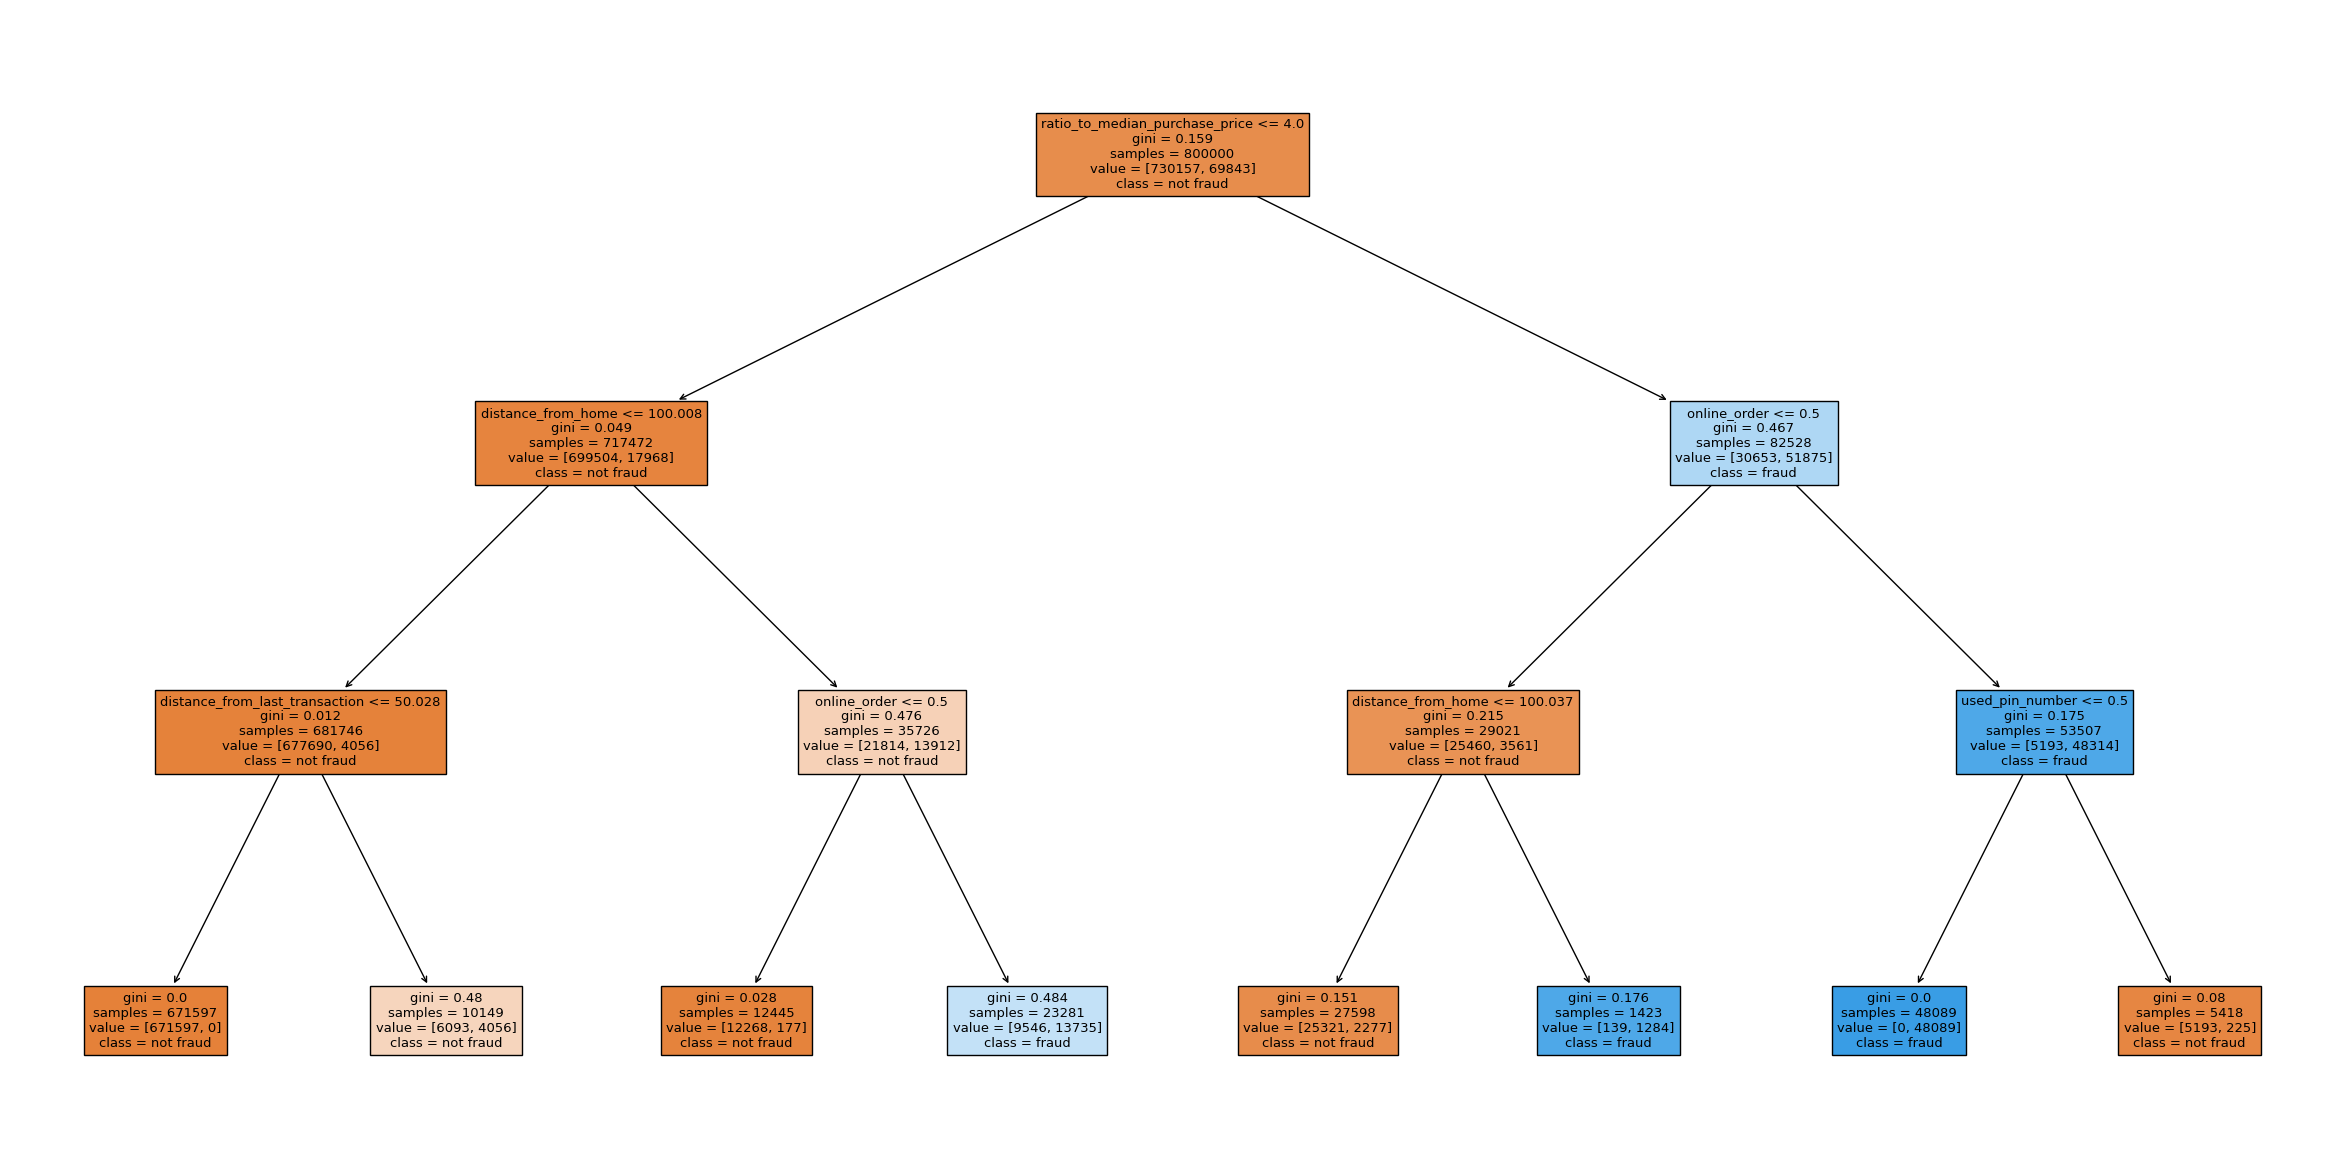

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182440
         1.0       0.87      0.90      0.89     17560

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000



In [118]:
plt.figure(figsize=(30,15))
# plot the decision tree
# left nodes are 'true', right nodes are 'false'
tree.plot_tree(dtc, filled=True, feature_names=list(
    df.drop(columns='fraud').columns), class_names=['not fraud', 'fraud'])
plt.show()

# plot the metrics for precision, recall and f1-score
report = metrics.classification_report(y_test, y_pred)
print(report)

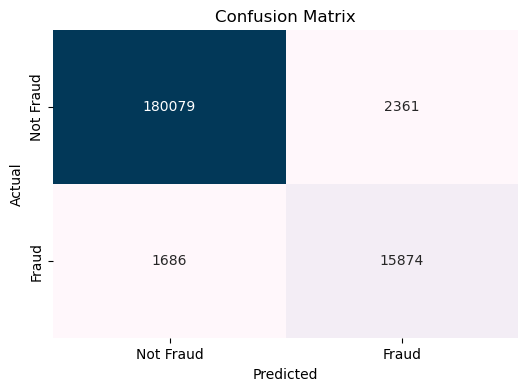

In [130]:
# create a confusion matrix for the testing set and the predictions
cm = confusion_matrix(y_test, y_pred)
# plot a seaborn heatmap of the confusion matrix
# predictions lie of the x-axis, while the actual values lie on the y-axis
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'], cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

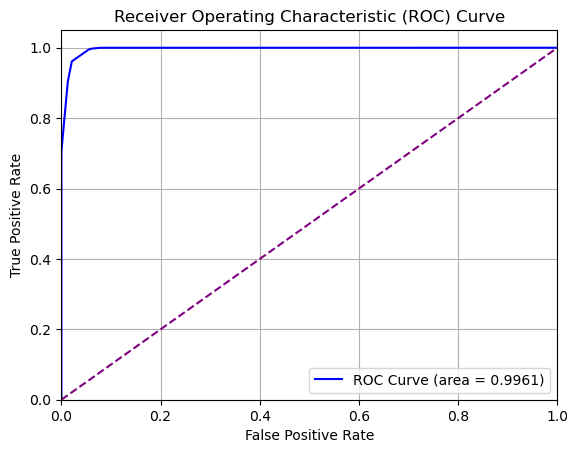

In [135]:
# find the probability scores for the test data set 
y_scores = dtc.predict_proba(X_test)[:, 1]
# calculate the false positive rate and true positive rate on the data and 
# use this to calculate the area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Logistic Regression Modeling

In [137]:
# create a standard scaler
scaler = StandardScaler()
# scale the training data and fit it
X_train_scaled = scaler.fit_transform(X_train)
# scale the test data, but do not fit it
X_test_scaled = scaler.transform(X_test)

In [139]:
# create the shell for a logistic regression model
lrm = LogisticRegression()
# fit the logistic regression model to the scaled training data
lrm.fit(X_train_scaled, y_train)
# make a prediction on the scaled test data
y_pred = lrm.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182440
         1.0       0.90      0.60      0.72     17560

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



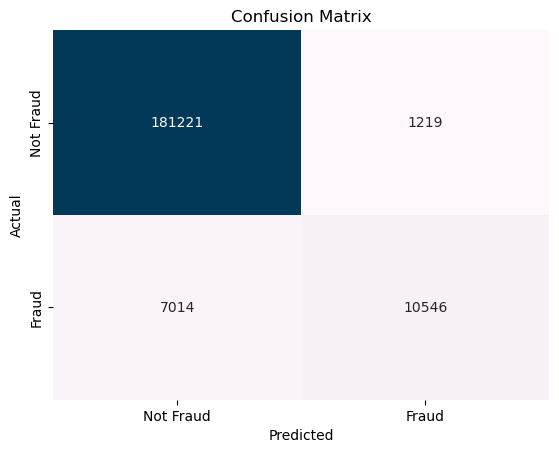

In [140]:
# generate the classification report for the logistic regression model
print(metrics.classification_report(y_test, y_pred))

# create a confusion matrix on the test set and predictions
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'], cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

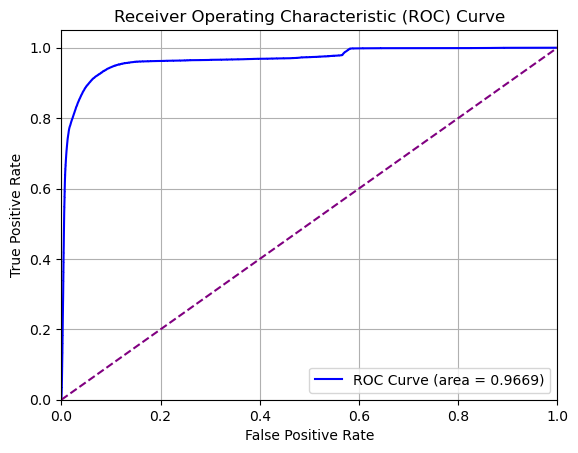

In [142]:
# find the probability scores for the logistic regression model
y_scores = lrm.predict_proba(X_test_scaled)[:, 1]
# find the false positive rate, true positive rate, and calculate the area under the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)
roc_auc = metrics.auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()